# **Advanced Plotting**

## **Heatmaps**

A heat map is a graphical representation of data where values are depicted by colors. Heatmap allow you to easier spot where something happened and where it didn't. Consequently, what we choose for our color palette is important. Two types of color palettes are:

1. **Sequential:** appropriate when data ranges from relatively low values to relatively high values.
2. **Qualitative:** best when you want to distinguish discrete chunks of data that **do not have inherent ordering**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load Data

The data is a confusion matrix which is a table that is often used to describe the performance of a machine learning classification model. It tells you where the predictions went wrong.

This particular table i derived from predicting labels for digits from 0-9.

In [2]:
confusion = np.array([[37, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 39, 0, 0, 0, 0, 1, 0, 2, 1],
                      [0, 0, 41, 3, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 44, 0, 0, 0, 0, 1, 0],
                      [0, 0, 0, 0, 37, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 46, 0, 0, 0, 2],
                      [0, 1, 0, 0, 0, 0, 51, 0, 0, 0],
                      [0, 0, 0, 1, 1, 0, 0, 46, 0, 0],
                      [0, 3, 1, 0, 0, 0, 0, 0, 44, 0],
                      [0, 0, 0, 0, 0, 1, 0, 0, 2, 44]])

### Seaborn with Sequential Colormap

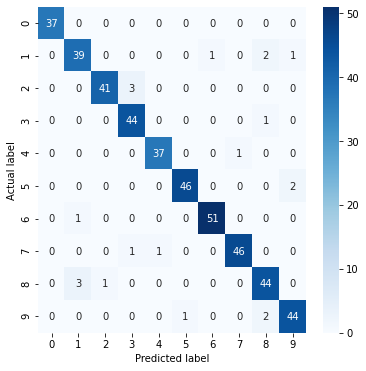

In [3]:
# sequential Sequential: appropriate when data ranges from relatively low
# {uninteresting values} to relatively high (interesting values).
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Seaborn with Qualitative Colormap

Qualitative colormap are best when you want to distinguish discrete chunks of data that **do not have inherent ordering**.

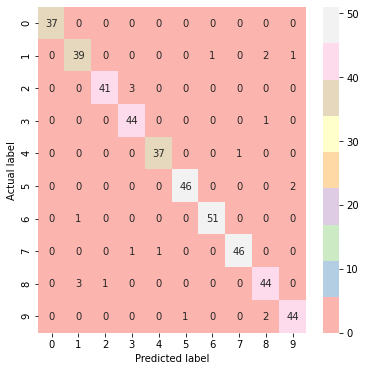

In [4]:
# sequential Sequential: appropriate when data ranges from relatively low
# {uninteresting values} to relatively high (interesting values).
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, cmap='Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Matplotlib

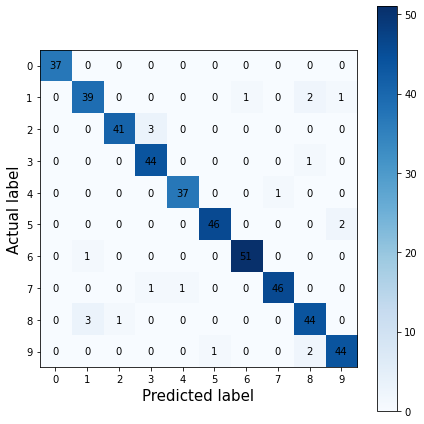

In [5]:
# this is a lot of code that is not trivial to create
plt.figure(figsize=(6, 6))
plt.imshow(confusion, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], size=10)
plt.yticks(tick_marks, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], size=10)
plt.tight_layout()
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)
width, height = confusion.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(confusion[x][y]), xy=(y, x), horizontalalignment='center', verticalalignment='center')

## **Histograms**

It is a common practice to create histograms to explore your data as it can give you a general idea of what your data looks like. A histogram is a summary of the variation in a measured variable. It shows the number of samples that occur in a category. A histogram is a type of frequency distribution.

Histograms work by binning the entire range of values into a series of intervals and then counting how many values fall into each interval. While the intervals are often of equal size, they are not required to be.

### Load Data

The data we will use to demonstrate histograms is the House Sale in King County, USA dataset.

In [6]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Histograms using Pandas

The goal of this particular visualization is to make a histogram on the `price` column. In doing this, you will see creating a data visualization can be an iterative process.

In [7]:
df['price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

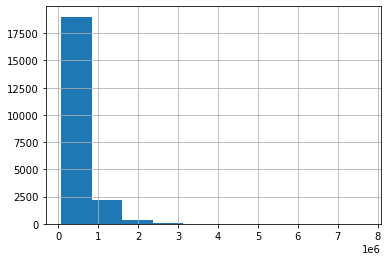

In [8]:
# Keep in mind that visualizations are an interactive process.
df['price'].hist();

In [9]:
# If you want a quick solution to make the sticklabels readable,
# try changing the plot style
plt.style.use('seaborn')

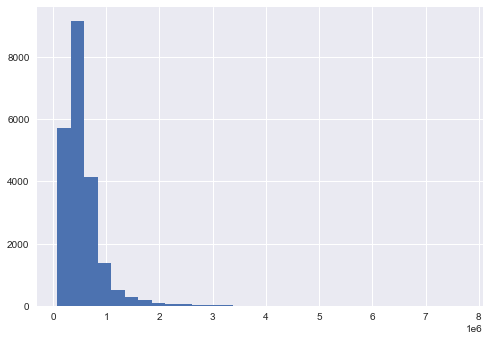

In [10]:
# Change the number of bins
# Seems better, but we still have empty space
df['price'].hist(bins=30);

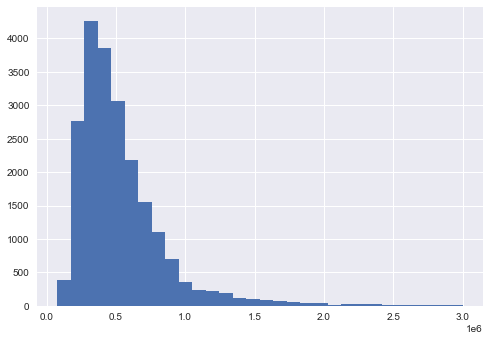

In [11]:
# Visualizing a subset of the data
price_filter = df.loc[:, 'price'] <= 3000000
df.loc[price_filter, 'price'].hist(bins=30);